In [1]:
from PIL import Image, ImageDraw, ImageFont
import random

In [19]:
save_path = "/Users/sandra/Desktop/ABI/bild02.png"

folder = "/Users/sandra/Desktop/ABI/Trainer_vor_2023"


Fehler beim Laden von .DS_Store: cannot identify image file '/Users/sandra/Desktop/ABI/Trainer_vor_2023/.DS_Store'
Es gibt 23 Positionen in der Maske für den Buchstaben A.
23 Bilder werden verwendet.


/Users/sandra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.


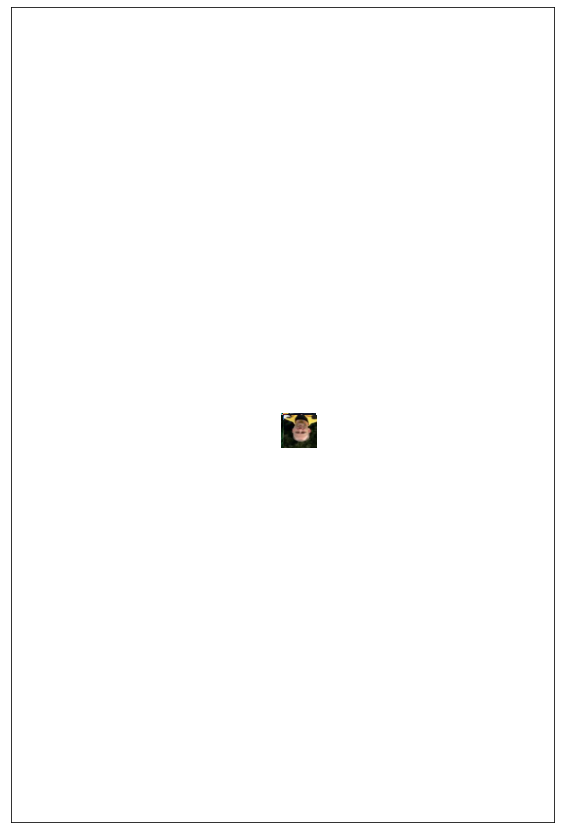

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# Funktion zum Laden von Bildern aus einem Ordner
def load_images_from_folder(folder, img_size=(60, 60)):  # Bildgröße auf 60x60 Pixel gesetzt
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path).resize(img_size)
            images.append(img)
        except Exception as e:
            print(f"Fehler beim Laden von {filename}: {e}")
    return images

# Funktion zur Anordnung von Bildern im "A"-Muster und Speichern des Bildes
def create_a_collage_from_folder(folder, img_size=(60, 60), save_path='collage_A.png'):
    # Größe des Buchstabens "A" in Pixeln
    output_width = 1000
    output_height = 1500
    grid_size = (10, 15)  # (Reihen, Spalten), um das "A" anzupassen

    # Bilder aus dem angegebenen Ordner laden
    images = load_images_from_folder(folder, img_size)
    
    # Überprüfen, ob genügend Bilder vorhanden sind
    if len(images) == 0:
        print("Keine Bilder im Ordner gefunden.")
        return

    fig, ax = plt.subplots(figsize=(output_width / 100, output_height / 100))  # Größe in Zoll
    ax.set_xlim(0, output_width)
    ax.set_ylim(0, output_height)
    ax.set_xticks([])
    ax.set_yticks([])

    # Zeichne den Buchstaben "A" auf eine leere Leinwand, um die Pixelpositionen zu erhalten
    canvas = Image.new('L', (output_width, output_height), 0)
    draw = ImageDraw.Draw(canvas)

    # Verwende eine größere Schriftart
    try:
        font = ImageFont.truetype("arial.ttf", 400)  # Größere Schriftart für das "A"
    except IOError:
        font = ImageFont.load_default()  # Fallback auf Standardfont

    # Berechne die Textgröße und positioniere das "A" in der Mitte
    text = "A"
    text_size = draw.textsize(text, font=font)
    text_position = ((output_width - text_size[0]) // 2, (output_height - text_size[1]) // 2)
    draw.text(text_position, text, fill=255, font=font)

    # Binäre Maske des Buchstaben "A"
    mask = np.array(canvas)
    positions = np.column_stack(np.where(mask > 0))

    # Überprüfen, ob genügend Positionen vorhanden sind
    num_images = min(len(positions), len(images))  # Nutze entweder die Anzahl der Positionen oder der Bilder
    print(f"Es gibt {len(positions)} Positionen in der Maske für den Buchstaben A.")
    print(f"{num_images} Bilder werden verwendet.")

    # Ordne die Bilder an den exakten Positionen im Gitter an
    for i, pos in enumerate(positions[:num_images]):
        x, y = pos[1], pos[0]  # Spalten = X, Zeilen = Y
        img = images[i]
        ax.imshow(np.array(img), extent=[x, x + img_size[0], y, y + img_size[1]])

    plt.gca().invert_yaxis()

    # Speichern der Collage
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()

# Beispielaufruf: Ordne die Bilder aus einem Ordner in Form eines "A" an und speichere es ab
create_a_collage_from_folder(folder, save_path=save_path)
